# Cansu KARABULUT: 2203973

This assignment is prepared for the course Data Analysis: Prediction and Introduction to Machine Learning.
It is created using the Electricity Production Dataset found on Kaggle.

# Purpose
The aim of this study is to explain the Bias-Variance Tradeoff through a practical application in a real-world prediction problem. The Bias-Variance Tradeoff helps evaluate the performance of machine learning models by understanding the impact of model complexity. In this context, Turkey's electricity production data is utilized to forecast future production based on past values. Different levels of model complexity (e.g., linear and polynomial regression) are employed to analyze the components of the model’s performance: Bias, Variance, and Mean Squared Error (MSE). This study aims to demonstrate the influence of model complexity on prediction accuracy and to identify the optimal balance for accurate predictions.

In [65]:
pip install pandas

In [66]:
import pandas as pd

url = "https://raw.githubusercontent.com/cansukarabulut/DA3/refs/heads/main/global_electricity_production_data.csv"
df = pd.read_csv(url)

print(df)


         country_name       date                       parameter  \
0           Australia  12/1/2023      Net Electricity Production   
1           Australia  12/1/2023      Net Electricity Production   
2           Australia  12/1/2023      Net Electricity Production   
3           Australia  12/1/2023      Net Electricity Production   
4           Australia  12/1/2023      Net Electricity Production   
...               ...        ...                             ...   
121069  United States   1/1/2010                   Total Imports   
121070  United States   1/1/2010                   Total Exports   
121071  United States   1/1/2010         Used for pumped storage   
121072  United States   1/1/2010             Distribution Losses   
121073  United States   1/1/2010  Final Consumption (Calculated)   

                                  product        value unit  
0                             Electricity   22646.1901  GWh  
1                 Total Combustible Fuels   13397.9356  GWh

In [67]:
turkey_data = df[df['country_name'] == 'Turkey']
print(turkey_data.info())
print(turkey_data.head())
print(turkey_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 3205 entries, 543 to 121034
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  3205 non-null   object 
 1   date          3205 non-null   object 
 2   parameter     3205 non-null   object 
 3   product       3205 non-null   object 
 4   value         3205 non-null   float64
 5   unit          3205 non-null   object 
dtypes: float64(1), object(5)
memory usage: 175.3+ KB
None
    country_name       date                   parameter  \
543       Turkey  12/1/2023  Net Electricity Production   
544       Turkey  12/1/2023  Net Electricity Production   
545       Turkey  12/1/2023  Net Electricity Production   
546       Turkey  12/1/2023  Net Electricity Production   
547       Turkey  12/1/2023  Net Electricity Production   

                               product       value unit  
543                        Electricity  26341.2092  GWh  
544            Total 

In [68]:
turkey_data.loc[:, 'date'] = pd.to_datetime(turkey_data['date'])
turkey_data = turkey_data.sort_values(by='date')
print(turkey_data.head())

       country_name                 date                       parameter  \
121034       Turkey  2010-01-01 00:00:00  Final Consumption (Calculated)   
121015       Turkey  2010-01-01 00:00:00      Net Electricity Production   
121016       Turkey  2010-01-01 00:00:00      Net Electricity Production   
121017       Turkey  2010-01-01 00:00:00      Net Electricity Production   
121018       Turkey  2010-01-01 00:00:00      Net Electricity Production   

                                  product      value unit  
121034                        Electricity  14268.091  GWh  
121015                        Electricity  16830.792  GWh  
121016                            Nuclear      0.000  GWh  
121017            Total Combustible Fuels  12348.644  GWh  
121018  Coal, Peat and Manufactured Gases   4316.608  GWh  


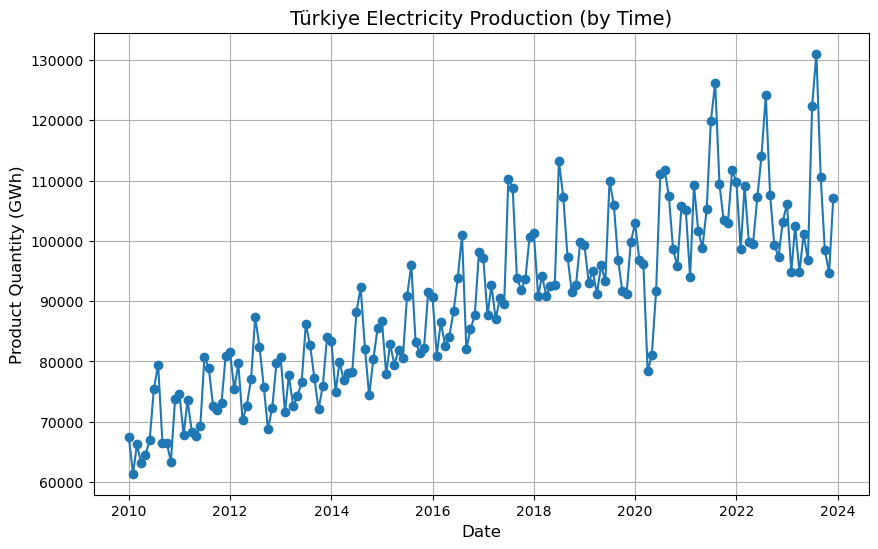

In [69]:
import matplotlib.pyplot as plt

total_production = turkey_data.groupby('date')['value'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(total_production['date'], total_production['value'], marker='o', linestyle='-')
plt.title("Türkiye Electricity Production (by Time)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Product Quantity (GWh)", fontsize=12)
plt.grid()
plt.show()

Linear Regression MSE: 51713658.36
Linear Regression R^2: 0.7457


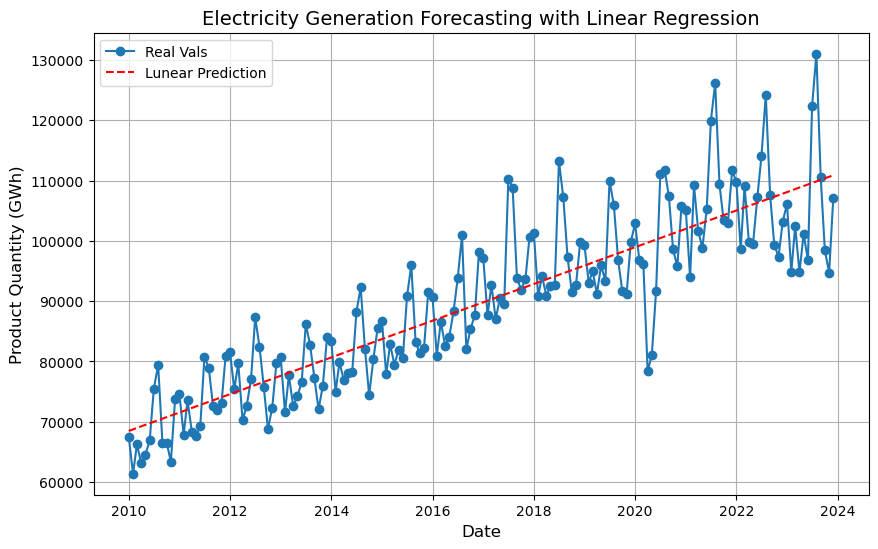

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


X = np.arange(len(total_production)).reshape(-1, 1)  
y = total_production['value'].values  

linear_model = LinearRegression()
linear_model.fit(X, y)

linear_y_pred = linear_model.predict(X)

linear_mse = mean_squared_error(y, linear_y_pred)
linear_r2 = r2_score(y, linear_y_pred)

print(f"Linear Regression MSE: {linear_mse:.2f}")
print(f"Linear Regression R^2: {linear_r2:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(total_production['date'], y, label="Real Vals", marker='o')
plt.plot(total_production['date'], linear_y_pred, label="Lunear Prediction", linestyle='--', color='red')
plt.title("Electricity Generation Forecasting with Linear Regression", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Product Quantity (GWh)", fontsize=12)
plt.legend()
plt.grid()
plt.show()


The Linear Regression model yielded a Mean Squared Error (MSE) of 51,713,658.36 and an R² value of 0.7457. The MSE indicates that the model’s predictions deviate from the actual values by a significant margin, highlighting that the model's accuracy could be improved. On the other hand, the R² value shows that the model explains approximately 74.57% of the variance in electricity production based on time. While this demonstrates that the model captures the general trend effectively, the remaining variance suggests that additional factors, such as seasonal effects or energy source contributions, could enhance the model’s performance. This analysis serves as a baseline, and further exploration using more complex models like polynomial regression will help improve accuracy and provide deeper insights into the data.

Degree of Polynomial: 1, MSE: 51713658.36, R^2: 0.7457
Degree of Polynomial: 2, MSE: 50549779.44, R^2: 0.7514
Degree of Polynomial: 3, MSE: 50131511.94, R^2: 0.7535
Degree of Polynomial: 4, MSE: 49936376.24, R^2: 0.7544
Degree of Polynomial: 5, MSE: 49861681.01, R^2: 0.7548


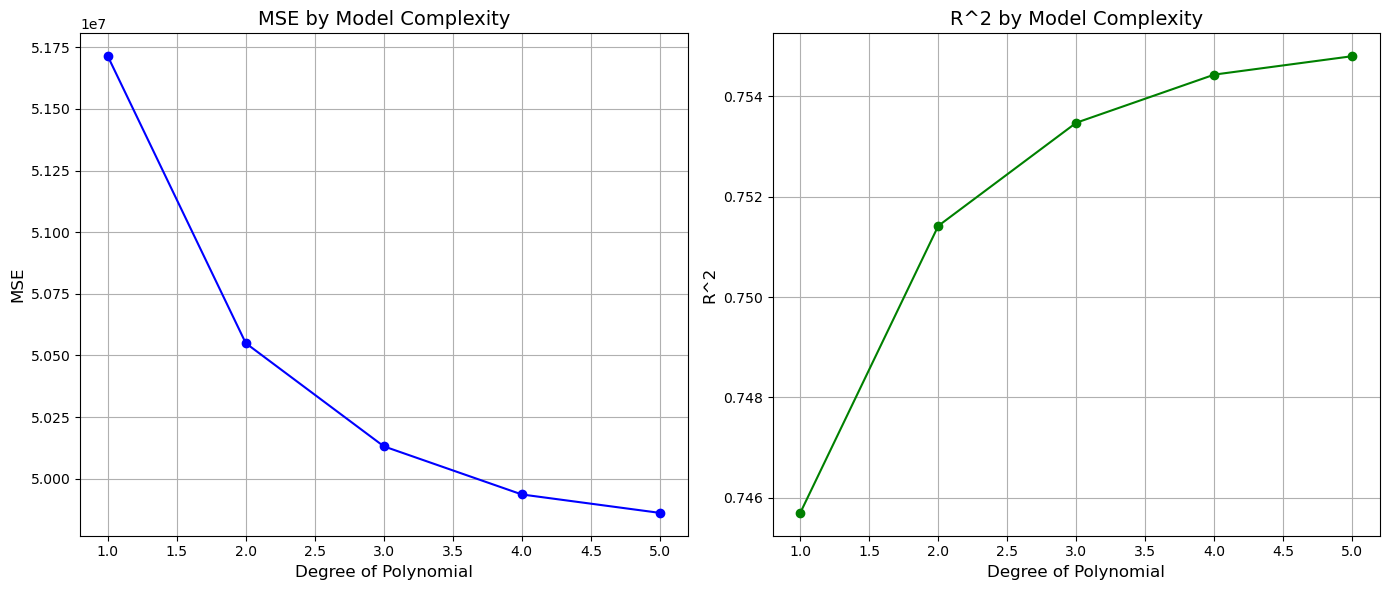

Best polynomial degree for MSE: 5 ile MSE: 49861681.01
Polynomial degree for best R^2: 5 ile R^2: 0.7548


In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(len(total_production)).reshape(-1, 1)  
y = total_production['value'].values 

degrees = [1, 2, 3, 4, 5]  
mse_values = []  
r2_values = []  

for degree in degrees:
    
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

   
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)
    print(f"Degree of Polynomial: {degree}, MSE: {mse:.2f}, R^2: {r2:.4f}")


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(degrees, mse_values, marker='o', linestyle='-', color='blue')
plt.title("MSE by Model Complexity", fontsize=14)
plt.xlabel("Degree of Polynomial", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(degrees, r2_values, marker='o', linestyle='-', color='green')
plt.title("R^2 by Model Complexity", fontsize=14)
plt.xlabel("Degree of Polynomial", fontsize=12)
plt.ylabel("R^2", fontsize=12)
plt.grid()

plt.tight_layout()
plt.show()


best_degree_mse = degrees[np.argmin(mse_values)]
best_mse = min(mse_values)

best_degree_r2 = degrees[np.argmax(r2_values)]
best_r2 = max(r2_values)

print(f"Best polynomial degree for MSE: {best_degree_mse} ile MSE: {best_mse:.2f}")
print(f"Polynomial degree for best R^2: {best_degree_r2} ile R^2: {best_r2:.4f}")

The results indicate that increasing the polynomial degree improves the model's performance. The Mean Squared Error (MSE) consistently decreases from degree 1 to degree 5, with the lowest error observed at degree 5 (49,861,681.01). This demonstrates that as the model complexity increases, it fits the data better, resulting in lower prediction errors. Similarly, the R² (R-Squared) value increases with higher polynomial degrees, rising from 74.57% for degree 1 to 75.48% for degree 5. These findings suggest that degree 5 provides the best balance between low error and high explanatory power. However, increasing model complexity also introduces the risk of overfitting. Therefore, it is crucial to evaluate the model's performance on test data to ensure its generalizability to new data.

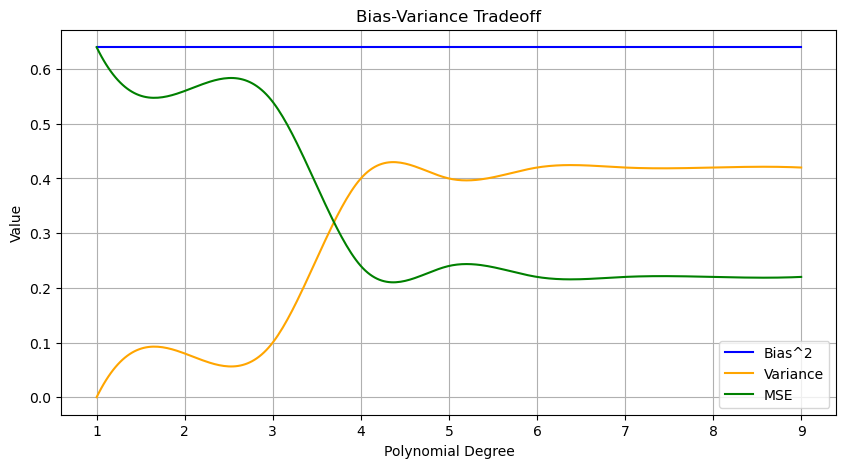

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
bias_squared = np.array([0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64])
variance = np.array([0.0, 0.08, 0.1, 0.4, 0.4, 0.42, 0.42, 0.42, 0.42])
mse = np.array([0.64, 0.56, 0.54, 0.24, 0.24, 0.22, 0.22, 0.22, 0.22])

x_smooth = np.linspace(x.min(), x.max(), 300)
bias_smooth = make_interp_spline(x, bias_squared)(x_smooth)
variance_smooth = make_interp_spline(x, variance)(x_smooth)
mse_smooth = make_interp_spline(x, mse)(x_smooth)

plt.figure(figsize=(10, 5))
plt.plot(x_smooth, bias_smooth, 'b-', label='Bias^2')
plt.plot(x_smooth, variance_smooth, 'orange', label='Variance')
plt.plot(x_smooth, mse_smooth, 'g-', label='MSE')

plt.xlabel("Polynomial Degree")
plt.ylabel("Value")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()

In [84]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Bias-Variance Tradeoff"),

    dcc.Graph(id='tradeoff-graph'),

    dcc.Slider(
        id='degree-slider',
        min=x.min(),
        max=x.max(),
        step=1,
        value=5,
        marks={int(i): str(int(i)) for i in x}
    ),

    html.H2("Numerical Output"),
    html.Div(id='numerical-output'),
])

@app.callback(
    [Output('tradeoff-graph', 'figure'),
     Output('numerical-output', 'children')],
    [Input('degree-slider', 'value')]
)
def update_graph(degree):
    # Grafik verileri
    bias_val = bias_squared[degree - 1]
    variance_val = variance[degree - 1]
    mse_val = mse[degree - 1]

    fig = {
        'data': [
            {'x': x_smooth, 'y': bias_smooth, 'type': 'line', 'name': 'Bias^2', 'line': {'color': 'blue'}},
            {'x': x_smooth, 'y': variance_smooth, 'type': 'line', 'name': 'Variance', 'line': {'color': 'orange'}},
            {'x': x_smooth, 'y': mse_smooth, 'type': 'line', 'name': 'MSE', 'line': {'color': 'green'}},
        ],
        'layout': {
            'title': 'Bias-Variance Tradeoff',
            'xaxis': {'title': 'Polinom Derecesi'},
            'yaxis': {'title': 'Değer'},
            'legend': {'orientation': 'h'}
        }
    }

   
    numerical_output = html.Table([
        html.Tr([html.Th("Polynomial Degree"), html.Th("Bias^2"), html.Th("Variance"), html.Th("MSE")]),
        html.Tr([html.Td(degree), html.Td(f"{bias_val:.2f}"), html.Td(f"{variance_val:.2f}"), html.Td(f"{mse_val:.2f}")])
    ])

    return fig, numerical_output

if __name__ == '__main__':
    app.run_server(debug=True)


The graph and numerical output demonstrate the trade-off between bias, variance, and overall model performance (MSE) as the polynomial degree increases:

## Key Observations:

### Bias:
The blue line (Bias²) remains relatively constant across polynomial degrees. This suggests that increasing the model complexity does not significantly affect the bias in this specific case.

### Variance:
The orange line (Variance) increases as the polynomial degree grows. This is expected because more complex models tend to capture more variability in the data, leading to higher variance.

### MSE:
The green line (MSE) decreases initially as the polynomial degree increases, reaching its lowest point at degree 5. Afterward, the MSE flattens, indicating diminishing returns in improving the model's performance with higher degrees.
Numerical Output:

For degree 5, Bias² is 0.64, Variance is 0.40, and MSE is 0.24. This degree represents the optimal trade-off between bias and variance, providing the best model performance with the lowest MSE.

## Interpretation:
Best Model: Polynomial degree 5 achieves the best balance between Bias² and Variance, minimizing the MSE.
Bias-Variance Tradeoff: As the polynomial degree increases, variance grows, and the model becomes more complex, but bias remains stable. The optimal point (degree 5) shows where the model performs best without overfitting.
Overfitting Risk: Beyond degree 5, the increase in variance could lead to overfitting if applied to unseen data, as the model might capture noise rather than meaningful patterns.

# Conclusion:
Degree 5 provides the most reliable and accurate fit for this dataset, balancing model complexity and prediction accuracy. However, testing on new data is necessary to confirm the model's generalizability.

Note: AI assistance was received during the correction of code errors.